In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/housing.csv')

In [5]:
Data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
Data.dropna(inplace=True)

In [13]:
Data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Total_rooms,Total_bedrooms,bedroom_ratio,household_rooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.109259,0.055823,-0.015737,-0.045398,0.029967,0.060817,0.092657,0.042474,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.136543,-0.088207,-0.085637,-0.144638,-0.032552,-0.068248,-0.113815,-0.028851,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.243011,-0.241630,-0.137468,0.106432,-0.313918,-0.272112,0.136089,-0.374033,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.685321,0.728486,0.224278,0.133294,0.788192,0.744873,-0.187900,0.994614,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.723306,0.787492,0.017837,0.049686,0.760280,0.812971,0.084238,0.911263,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.109259,-0.136543,-0.243011,0.685321,0.723306,1.000000,0.932190,0.031790,-0.021904,0.864580,0.897523,0.016363,0.692314,0.115020,-0.071775,-0.012866,-0.059377,-0.014457
households,0.055823,-0.088207,-0.241630,0.728486,0.787492,0.932190,1.000000,0.046944,0.072765,0.931700,0.974593,0.037666,0.737526,0.072391,-0.087137,-0.009222,-0.005827,0.019715
median_income,-0.015737,-0.085637,-0.137468,0.224278,0.017837,0.031790,0.046944,1.000000,0.670085,0.251910,0.014404,-0.656833,0.263611,0.181213,-0.251182,-0.008832,0.057869,0.026652
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.021904,0.072765,0.670085,1.000000,0.158506,0.053311,-0.255880,0.153457,0.257614,-0.484787,0.023525,0.160526,0.140378
Total_rooms,0.029967,-0.032552,-0.313918,0.788192,0.760280,0.864580,0.931700,0.251910,0.158506,1.000000,0.945865,-0.250933,0.822663,0.020809,-0.012862,-0.007567,-0.016499,0.002862


<Axes: >

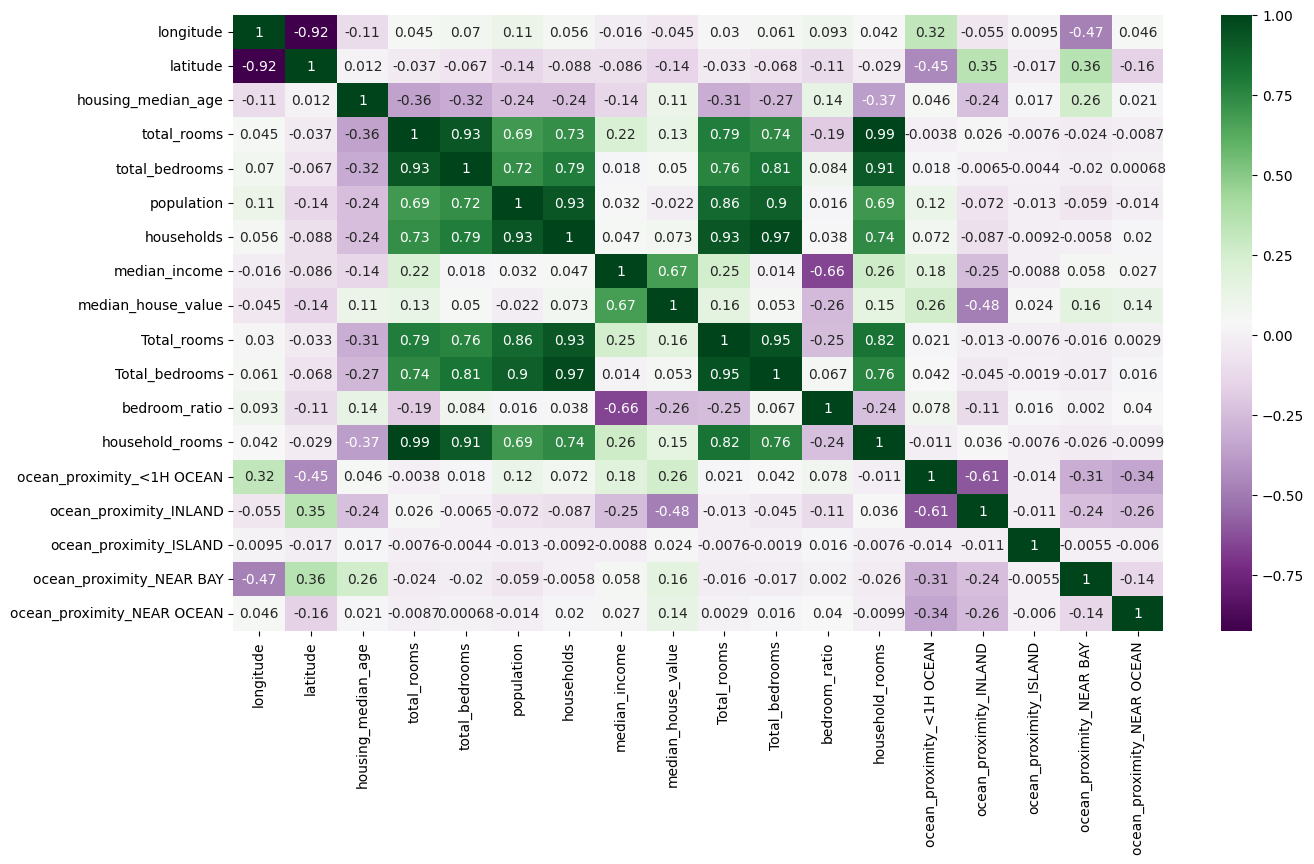

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(Data.corr(), annot=True, cmap="PRGn")

In [10]:
# Applying Feature engineering to the entire dataset BEFORE splitting
Data['Total_rooms'] = np.log(Data['total_rooms'] + 1)
Data['Total_bedrooms'] = np.log(Data['total_bedrooms'] + 1)
Data['population'] = np.log(Data['population'] + 1)
Data['households'] = np.log(Data['households'] + 1)
Data['median_income'] = np.log(Data['median_income'] + 1)

In [11]:
# Adding new features
Data['bedroom_ratio'] = Data['total_bedrooms'] / Data['total_rooms']
Data['household_rooms'] = Data['total_rooms'] / Data['households']

In [12]:
# One-hot encoding the categorical variable 'ocean_proximity'
Data = pd.get_dummies(Data, columns=['ocean_proximity'])

In [22]:
# Spliting data into features (X) and target (y)
X = Data.drop('median_house_value', axis=1)
y = Data['median_house_value']

In [23]:
# Spliting data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# Initializing the scaler
scaler = StandardScaler()

In [25]:
# Fitting the scaler on the training data and transforming both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Creating and training the Linear Regression model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Making predictions on the test data
y_pred = reg.predict(X_test_scaled)

In [28]:
# Evaluating the model on the test data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = reg.score(X_test_scaled, y_test)

In [29]:
print(f"Model score (R^2): {score}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Model score (R^2): 0.6616346221297258
Mean Squared Error: 4503299415.254389
Mean Absolute Error: 49931.138258660925


In [30]:
# Comparing predicted vs actual housing prices
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))  # Displaying the first 10 comparisons

         Actual      Predicted
14367  297700.0  327334.385523
8386   246300.0  295821.045399
8365   128100.0  211568.987877
2585   101100.0   73021.416557
1314   178600.0  226946.417117
6196   188900.0  200625.584605
18776   78600.0   42096.009263
13501   84500.0   66230.985479
8295   400000.0  336876.690585
5283   500001.0  322254.218872


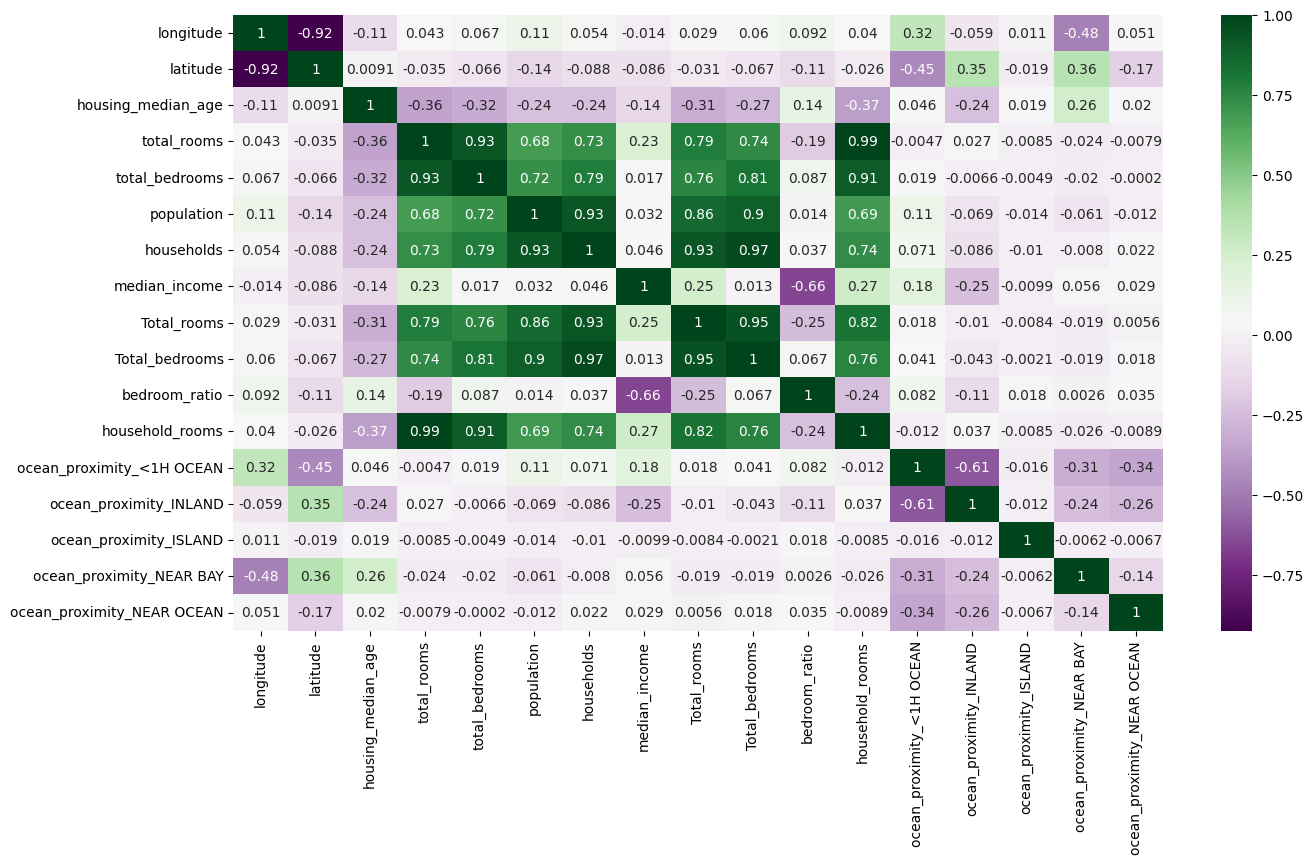

In [31]:
# Visualizing correlations using heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(X_train.corr(), annot=True, cmap="PRGn")
plt.show()

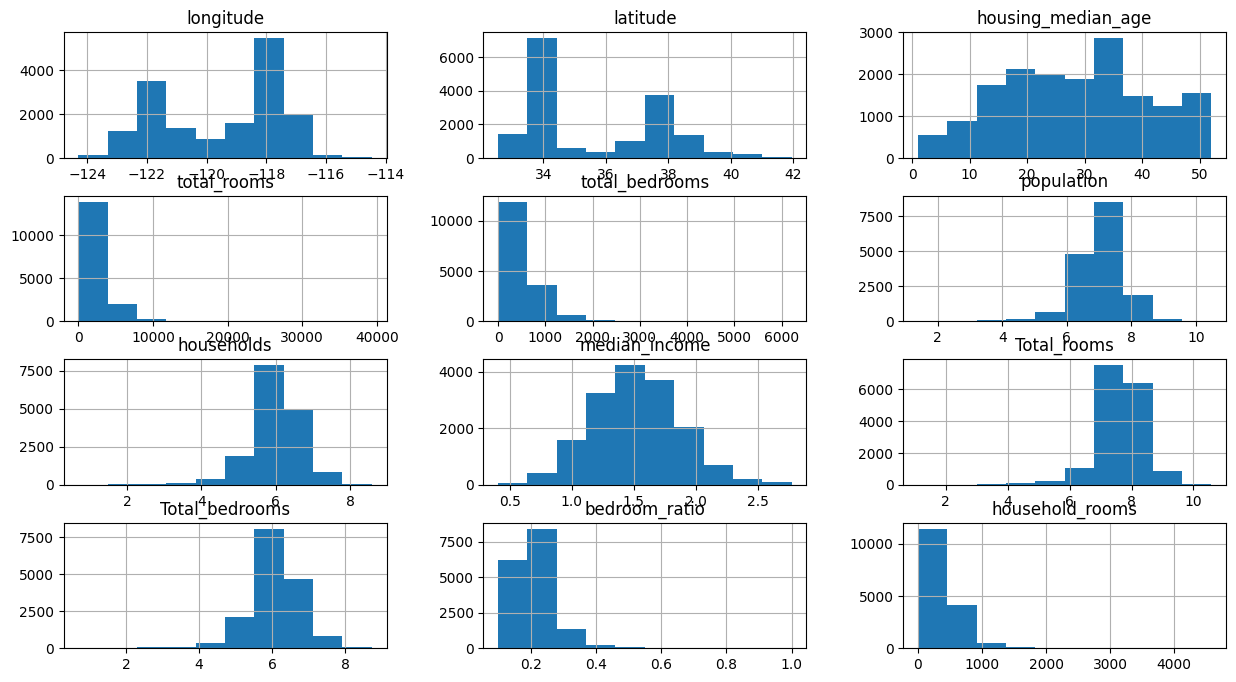

In [32]:
# Checking the distribution of training data
X_train.hist(figsize=(15, 8))
plt.show()

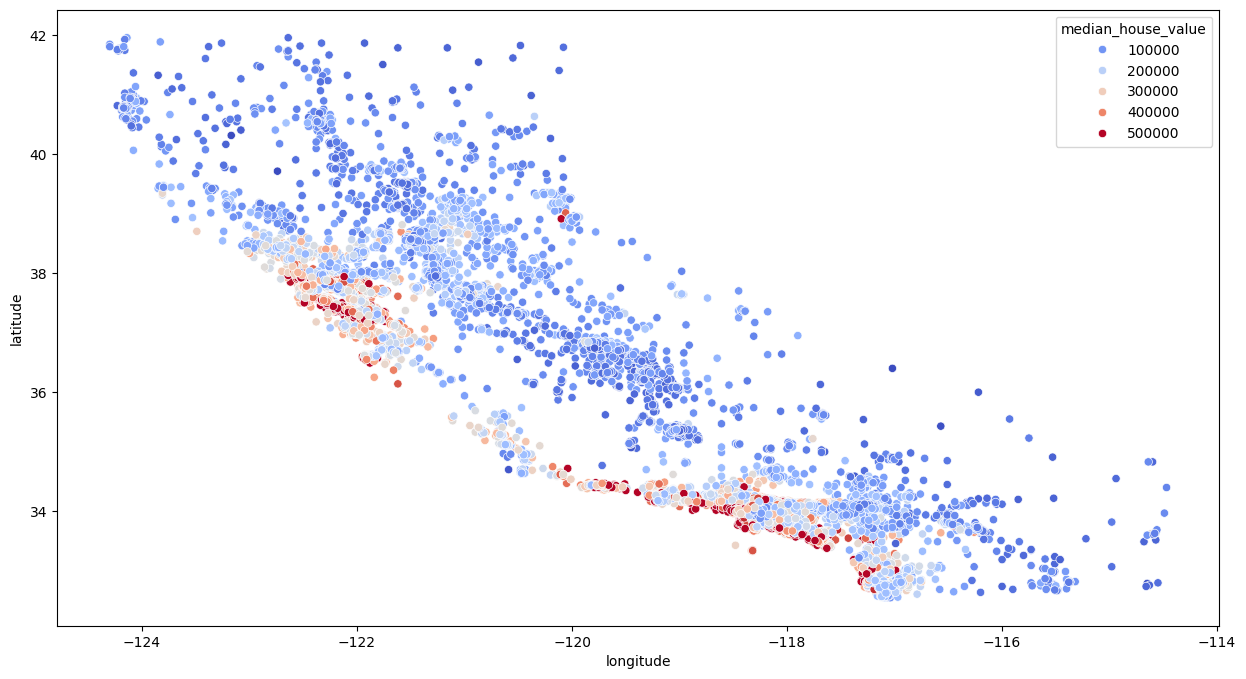

In [33]:
# Scatterplot to visualize geographical data (longitude, latitude vs house value)
plt.figure(figsize=(15, 8))
sns.scatterplot(x='longitude', y='latitude', hue=y_train, data=X_train, palette='coolwarm')
plt.show()

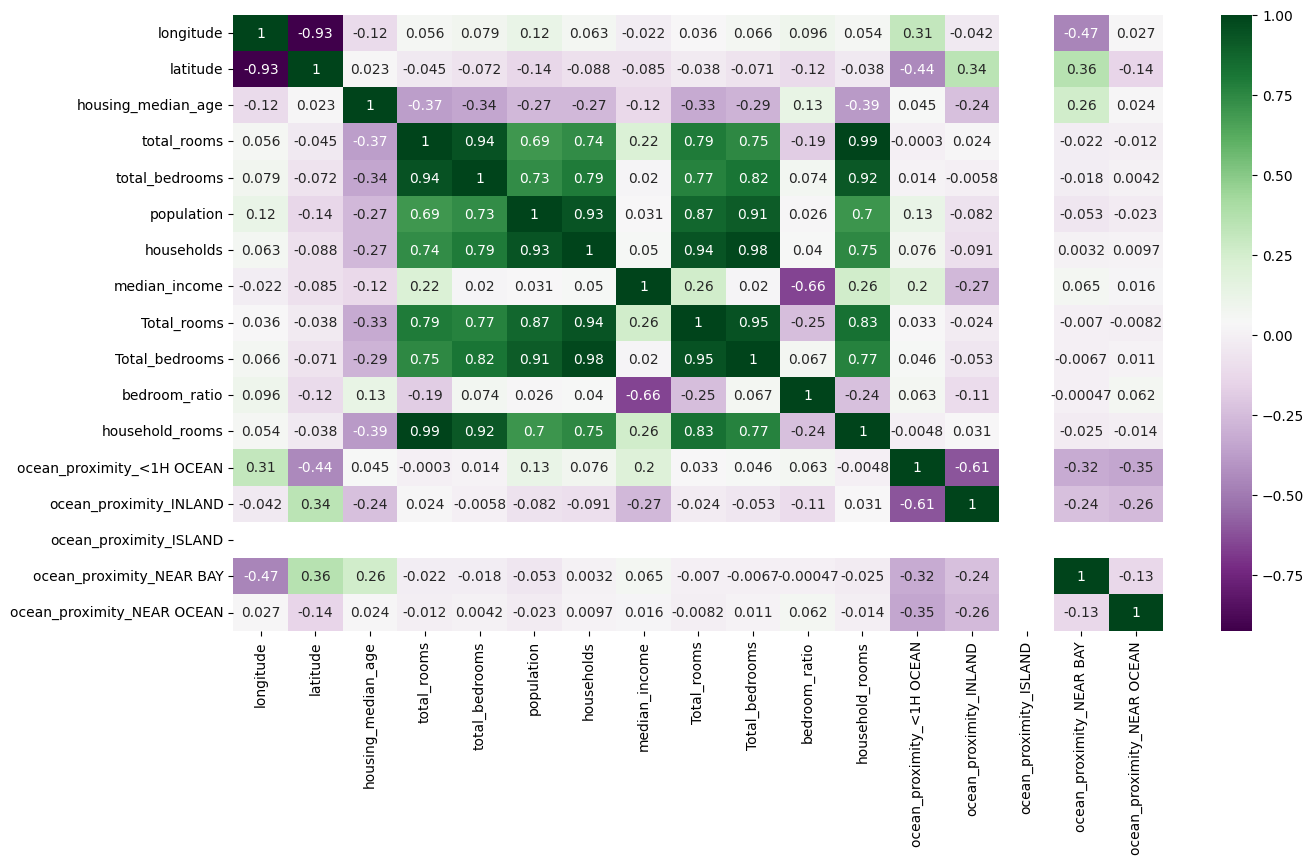

In [34]:
# Visualizing correlations using heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(X_test.corr(), annot=True, cmap="PRGn")
plt.show()

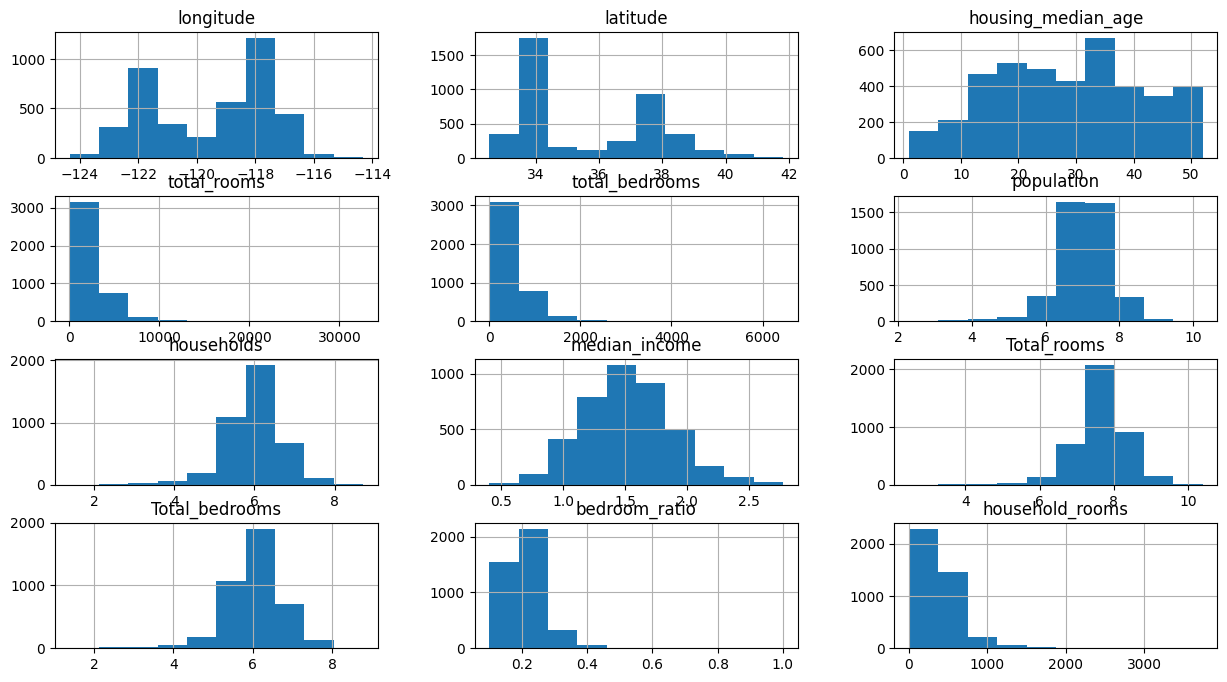

In [35]:
#Checking the distribution of testing data
X_test.hist(figsize=(15, 8))
plt.show()

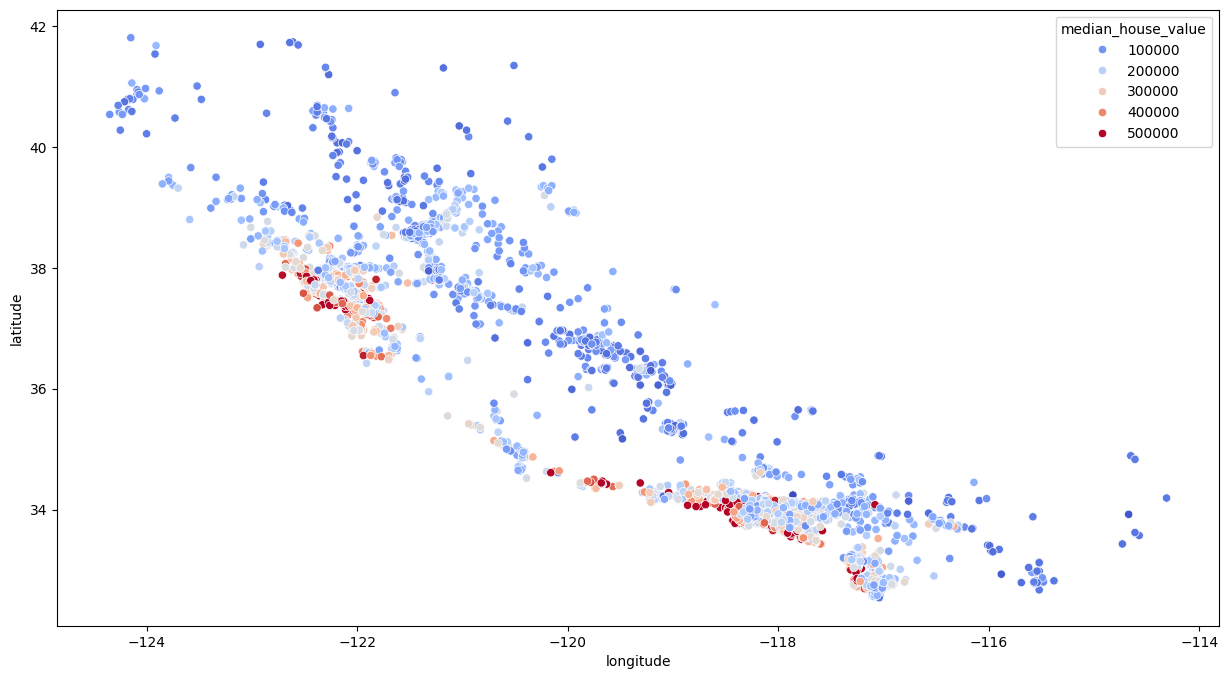

In [36]:
# Scatterplot to visualize geographical data (longitude, latitude vs house value)
plt.figure(figsize=(15, 8))
sns.scatterplot(x='longitude', y='latitude', hue=y_test, data=X_test, palette='coolwarm')
plt.show()